In [1]:
import uclchem
import os
import pandas as pd

In [2]:
# set a parameter dictionary for phase 1 collapse model

param_dict = {
    "initialDens": 1e4,  # starting density
    "initialTemp": 10.0,  # temperature of gas
    "initialBaseAv": 2.9287,  # visual extinction at cloud edge.
    'initialRadfield': 1,  # initial radiation field strength
    
    'tempRate': 0,
    'densRate': 0,
    'baseAvRate': 0,
    'radfieldRate': 0,

    'evolvingphysicalparams': True,
    'useavdirectly': True,
    
    "finalTime": 1.0e6,  # final time
    "rout": 0.1,  # radius of cloud in pc
    "endAtFinalDensity": False,  # stop at finalTime
    "freefall": False,  # don't increase density in freefall
}
# Ensure the output directory is present:
if not os.path.exists("../examples/test-output/"):
    os.makedirs("../examples/test-output/")

df = uclchem.model.cloud(param_dict=param_dict, return_dataframe=True,)
result_df = pd.concat([df[0], df[1]], axis=1)

In [3]:
conservation = uclchem.analysis.check_element_conservation(
    result_df, element_list=["H", "N", "C", "O", "S"]
)
print("Percentage change in total abundances:")
print(conservation)

Percentage change in total abundances:
{'H': '0.000%', 'N': '0.000%', 'C': '0.000%', 'O': '0.000%', 'S': '0.000%'}


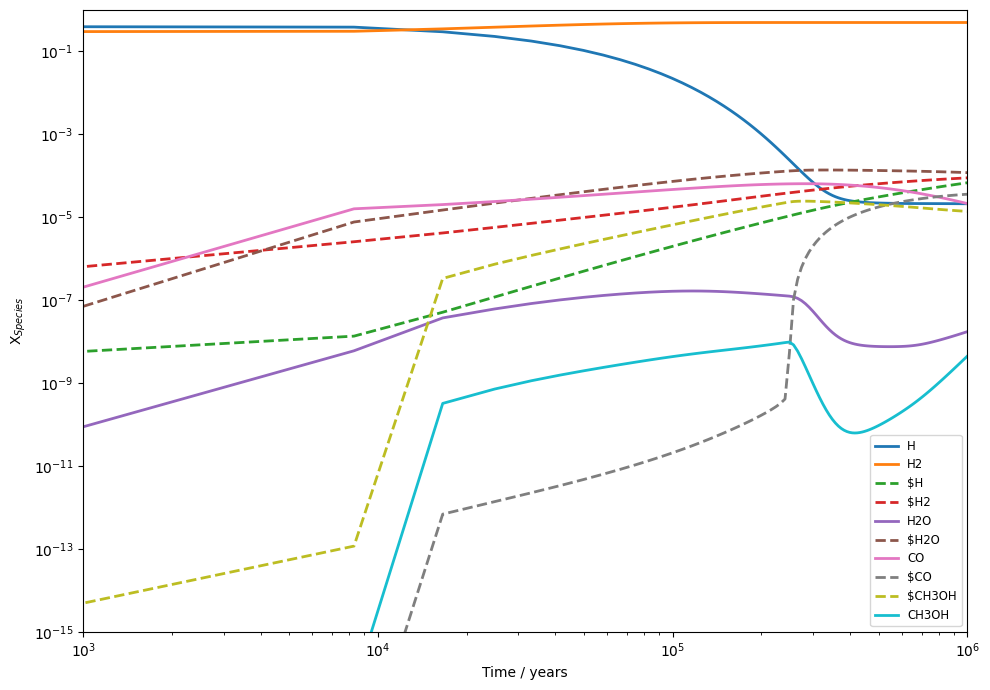

In [4]:
species = ["H", "H2", "$H", "$H2", "H2O", "$H2O", "CO", "$CO", "$CH3OH", "CH3OH"]
fig, ax = uclchem.analysis.create_abundance_plot(result_df, species, figsize=(10, 7))
ax = ax.set(xscale="log", ylim=(1e-15, 1), xlim=(1e3, 1e6))